In [ ]:
import os
import zipfile
import cv2
import numpy as np
import pandas as pd
from google.colab import files
from math import tan, radians

# Step 1: Upload zip
uploaded = files.upload()
for fname in uploaded:
    zip_path = fname

# Step 2: Extract zip
extracted_folder = 'extracted_uploaded_frames'
os.makedirs(extracted_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Step 3: Camera + Drone Parameters (edit if needed)
drone_altitude = 50  # in meters
camera_fov_deg = 78.8  # horizontal field of view in degrees
frame_width_px = 1280  # default width, will auto-detect later
real_object_width_m = 2.3  # real object width

# Step 4: Simulate dummy detection
def simulate_detection(img_shape):
    h, w = img_shape[:2]
    box_width = int(w * 0.2)
    box_height = int(h * 0.2)
    x1 = int(w * 0.4)
    y1 = int(h * 0.4)
    x2 = x1 + box_width
    y2 = y1 + box_height
    return (x1, y1, x2, y2)

# Step 5: Distance calculation from FOV
def estimate_distance_from_bbox_width(bbox_width_px, img_width_px, real_width_m, fov_deg):
    fov_rad = radians(fov_deg)
    pixel_size = 2 * tan(fov_rad / 2) * drone_altitude / img_width_px
    est_distance = (real_width_m * drone_altitude) / (bbox_width_px * pixel_size)
    return est_distance

# Step 6: Annotate and save frames
output_dir = 'final_eo_annotated'
os.makedirs(output_dir, exist_ok=True)
metadata = []

for fname in sorted(os.listdir(extracted_folder)):
    if fname.lower().endswith(('.jpg', '.png')):
        fpath = os.path.join(extracted_folder, fname)
        img = cv2.imread(fpath)
        h, w = img.shape[:2]

        # Update frame width from actual image
        frame_width_px = w

        # Simulate detection
        x1, y1, x2, y2 = simulate_detection(img.shape)
        bbox_width_px = x2 - x1

        # Estimate distance
        distance = estimate_distance_from_bbox_width(bbox_width_px, w, real_object_width_m, camera_fov_deg)

        # Draw annotations
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # red bbox
        cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
        cv2.circle(img, (cx, cy), 5, (0, 255, 0), -1)  # green capture point
        label = f"Detected {distance:.2f}m"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

        # Save annotated image
        save_path = os.path.join(output_dir, fname)
        cv2.imwrite(save_path, img)

        # Save metadata
        metadata.append({
            "frame": fname,
            "bbox_x1": x1,
            "bbox_y1": y1,
            "bbox_x2": x2,
            "bbox_y2": y2,
            "center_x": cx,
            "center_y": cy,
            "distance_m": round(distance, 2),
            "label": "Detected"
        })

# Step 7: Save CSV
df = pd.DataFrame(metadata)
df.to_csv('eo_annotated_metadata.csv', index=False)
print("✅ All frames annotated and saved to:", output_dir)
print("📄 Metadata CSV saved as: eo_annotated_metadata.csv")


Saving frame_0034.jpg to frame_0034.jpg
Saving frame_0041.jpg to frame_0041.jpg
Saving frame_0043.jpg to frame_0043.jpg
Saving frame_0045.jpg to frame_0045.jpg
Saving frame_0047.jpg to frame_0047.jpg
Saving frame_0054.jpg to frame_0054.jpg
Saving frame_0056.jpg to frame_0056.jpg
Saving frame_0060.jpg to frame_0060.jpg
Saving frame_0074.jpg to frame_0074.jpg


BadZipFile: File is not a zip file

In [ ]:
import os
import zipfile
import cv2
import numpy as np
import pandas as pd
from google.colab import files
from math import tan, radians

# Step 1: Upload zip
uploaded = files.upload()
for fname in uploaded:
    zip_path = fname

# Step 2: Extract zip
extracted_folder = 'extracted_uploaded_frames'
os.makedirs(extracted_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Step 3: Camera + Drone Parameters (edit if needed)
drone_altitude = 50  # in meters
camera_fov_deg = 78.8  # horizontal field of view in degrees
frame_width_px = 1280  # default width, will auto-detect later
real_object_width_m = 2.3  # real object width

# Step 4: Simulate dummy detection
def simulate_detection(img_shape):
    h, w = img_shape[:2]
    box_width = int(w * 0.2)
    box_height = int(h * 0.2)
    x1 = int(w * 0.4)
    y1 = int(h * 0.4)
    x2 = x1 + box_width
    y2 = y1 + box_height
    return (x1, y1, x2, y2)

# Step 5: Distance calculation from FOV
def estimate_distance_from_bbox_width(bbox_width_px, img_width_px, real_width_m, fov_deg):
    fov_rad = radians(fov_deg)
    pixel_size = 2 * tan(fov_rad / 2) * drone_altitude / img_width_px
    est_distance = (real_width_m * drone_altitude) / (bbox_width_px * pixel_size)
    return est_distance

# Step 6: Annotate and save frames
output_dir = 'final_eo_annotated'
os.makedirs(output_dir, exist_ok=True)
metadata = []

for fname in sorted(os.listdir(extracted_folder)):
    if fname.lower().endswith(('.jpg', '.png')):
        fpath = os.path.join(extracted_folder, fname)
        img = cv2.imread(fpath)
        h, w = img.shape[:2]

        # Update frame width from actual image
        frame_width_px = w

        # Simulate detection
        x1, y1, x2, y2 = simulate_detection(img.shape)
        bbox_width_px = x2 - x1

        # Estimate distance
        distance = estimate_distance_from_bbox_width(bbox_width_px, w, real_object_width_m, camera_fov_deg)

        # Draw annotations
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # red bbox
        cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
        cv2.circle(img, (cx, cy), 5, (0, 255, 0), -1)  # green capture point
        label = f"Detected {distance:.2f}m"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

        # Save annotated image
        save_path = os.path.join(output_dir, fname)
        cv2.imwrite(save_path, img)

        # Save metadata
        metadata.append({
            "frame": fname,
            "bbox_x1": x1,
            "bbox_y1": y1,
            "bbox_x2": x2,
            "bbox_y2": y2,
            "center_x": cx,
            "center_y": cy,
            "distance_m": round(distance, 2),
            "label": "Detected"
        })

# Step 7: Save CSV
df = pd.DataFrame(metadata)
df.to_csv('eo_annotated_metadata.csv', index=False)
print("✅ All frames annotated and saved to:", output_dir)
print("📄 Metadata CSV saved as: eo_annotated_metadata.csv")


Saving frame_0144.jpg to frame_0144.jpg


BadZipFile: File is not a zip file

In [ ]:
import os
import zipfile
import cv2
import numpy as np
import pandas as pd
from google.colab import files
from math import tan, radians

# Step 1: Upload zip
uploaded = files.upload()
for fname in uploaded:
    zip_path = fname

# Step 2: Extract zip
extracted_folder = 'extracted_uploaded_frames'
os.makedirs(extracted_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Step 3: Camera + Drone Parameters (edit if needed)
drone_altitude = 50  # in meters
camera_fov_deg = 78.8  # horizontal field of view in degrees
frame_width_px = 1280  # default width, will auto-detect later
real_object_width_m = 2.3  # real object width

# Step 4: Simulate dummy detection
def simulate_detection(img_shape):
    h, w = img_shape[:2]
    box_width = int(w * 0.2)
    box_height = int(h * 0.2)
    x1 = int(w * 0.4)
    y1 = int(h * 0.4)
    x2 = x1 + box_width
    y2 = y1 + box_height
    return (x1, y1, x2, y2)

# Step 5: Distance calculation from FOV
def estimate_distance_from_bbox_width(bbox_width_px, img_width_px, real_width_m, fov_deg):
    fov_rad = radians(fov_deg)
    pixel_size = 2 * tan(fov_rad / 2) * drone_altitude / img_width_px
    est_distance = (real_width_m * drone_altitude) / (bbox_width_px * pixel_size)
    return est_distance

# Step 6: Annotate and save frames
output_dir = 'final_eo_annotated'
os.makedirs(output_dir, exist_ok=True)
metadata = []

for fname in sorted(os.listdir(extracted_folder)):
    if fname.lower().endswith(('.jpg', '.png')):
        fpath = os.path.join(extracted_folder, fname)
        img = cv2.imread(fpath)
        h, w = img.shape[:2]

        # Update frame width from actual image
        frame_width_px = w

        # Simulate detection
        x1, y1, x2, y2 = simulate_detection(img.shape)
        bbox_width_px = x2 - x1

        # Estimate distance
        distance = estimate_distance_from_bbox_width(bbox_width_px, w, real_object_width_m, camera_fov_deg)

        # Draw annotations
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # red bbox
        cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
        cv2.circle(img, (cx, cy), 5, (0, 255, 0), -1)  # green capture point
        label = f"Detected {distance:.2f}m"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

        # Save annotated image
        save_path = os.path.join(output_dir, fname)
        cv2.imwrite(save_path, img)

        # Save metadata
        metadata.append({
            "frame": fname,
            "bbox_x1": x1,
            "bbox_y1": y1,
            "bbox_x2": x2,
            "bbox_y2": y2,
            "center_x": cx,
            "center_y": cy,
            "distance_m": round(distance, 2),
            "label": "Detected"
        })

# Step 7: Save CSV
df = pd.DataFrame(metadata)
df.to_csv('eo_annotated_metadata.csv', index=False)
print("✅ All frames annotated and saved to:", output_dir)
print("📄 Metadata CSV saved as: eo_annotated_metadata.csv")


Saving eo_frames_zip.zip to eo_frames_zip.zip
✅ All frames annotated and saved to: final_eo_annotated
📄 Metadata CSV saved as: eo_annotated_metadata.csv


In [ ]:
import os

# Rename to a clean name
os.rename("/content/final_demo_thermal (1).mp4", "/content/final_demo_thermal.mp4")
print("✅ File renamed.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/final_demo_thermal (1).mp4' -> '/content/final_demo_thermal.mp4'

In [ ]:
import os

os.rename(r"/content/final_demo_thermal (1).mp4", "/content/final_demo_thermal.mp4")
print("✅ File renamed successfully!")

FileNotFoundError: [Errno 2] No such file or directory: '/content/final_demo_thermal\\ \\(1\\).mp4' -> '/content/final_demo_thermal.mp4'

In [ ]:
import os

# Escape space and parentheses
os.rename("/content/final_demo_thermal\\ \\(1\\).mp4", "/content/final_demo_thermal.mp4")
print("✅ File renamed successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/final_demo_thermal\\ \\(1\\).mp4' -> '/content/final_demo_thermal.mp4'

In [ ]:
import os

# Use raw string and replace manually
original_path = r"/content/final_demo_thermal (1).mp4"
new_path = "/content/final_demo_thermal.mp4"
os.rename(original_path, new_path)
print("✅ File renamed successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/final_demo_thermal (1).mp4' -> '/content/final_demo_thermal.mp4'

In [ ]:
# Step 1: Upload the video
from google.colab import files
uploaded = files.upload()


Saving final_demo_thermal.mp4 to final_demo_thermal (1).mp4


In [ ]:
import cv2
import os
import zipfile
from google.colab import files

# Step 1: Upload the video (run this cell to upload manually)
from google.colab import files
uploaded = files.upload()

# Step 2: Extract 3 frames per second
video_path = next(iter(uploaded))  # gets the uploaded filename
output_dir = "thermal_frames_3fps"
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_interval = int(fps / 3)  # extract 3 frames per second

count = 0
saved = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if count % frame_interval == 0:
        filename = os.path.join(output_dir, f"frame_{saved:04d}.jpg")
        cv2.imwrite(filename, frame)
        saved += 1
    count += 1

cap.release()
print(f"✅ Extracted {saved} frames at 3 FPS.")

# Step 3: Zip the folder
zip_name = "thermal_frames_3fps.zip"
with zipfile.ZipFile(zip_name, "w") as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

# Step 4: Download the zip
files.download(zip_name)


KeyboardInterrupt: 

In [ ]:
import cv2
import os
import zipfile
from google.colab import files

# Step 1: Set the path of the uploaded video
video_path = "/content/final_demo_thermal.mp4"  # make sure this matches your uploaded filename

# Step 2: Create output folder
output_dir = "thermal_frames_3fps"
os.makedirs(output_dir, exist_ok=True)

# Step 3: Extract 3 frames per second
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_interval = int(fps / 3) if fps > 0 else 1  # avoid division by zero

count = 0
saved = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if count % frame_interval == 0:
        filename = os.path.join(output_dir, f"frame_{saved:04d}.jpg")
        cv2.imwrite(filename, frame)
        saved += 1
    count += 1

cap.release()
print(f"✅ Extracted {saved} frames at 3 FPS.")

# Step 4: Zip and download
zip_name = "thermal_frames_3fps.zip"
with zipfile.ZipFile(zip_name, "w") as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

files.download(zip_name)


✅ Extracted 457 frames at 3 FPS.


AttributeError: 'list' object has no attribute 'download'

In [ ]:
from google.colab import files


In [ ]:
import shutil
from google.colab import files

# Replace this with your actual folder name
frames_folder = "frames_final_demo_thermal"

# Zip the folder
zip_name = f"{frames_folder}.zip"
shutil.make_archive(frames_folder, 'zip', frames_folder)

# Download the zip file
files.download(zip_name)


FileNotFoundError: [Errno 2] No such file or directory: 'frames_final_demo_thermal'

In [ ]:
import os

os.listdir()


['.config',
 'thermal_frames_3fps.zip',
 'final_demo_thermal.mp4',
 'final_demo_thermal (1).mp4',
 'thermal_frames_3fps',
 'sample_data']

In [ ]:
import shutil
from google.colab import files

frames_folder = "thermal_frames_3fps"
zip_name = f"{frames_folder}.zip"

# Create a zip archive of the folder
shutil.make_archive(frames_folder, 'zip', frames_folder)

# Download the zip file
files.download(zip_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload 'final_demo.mp4'


Saving final_demo.mp4 to final_demo.mp4


In [ ]:
import cv2
import os

video_path = 'final_demo.mp4'  # Change if different
frames_folder = 'frames_final_demo_eo'
os.makedirs(frames_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
interval = int(fps // 3)  # 3 FPS

count = 0
saved = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if count % interval == 0:
        filename = os.path.join(frames_folder, f"frame_{saved:04d}.jpg")
        cv2.imwrite(filename, frame)
        saved += 1
    count += 1
cap.release()
print(f"✅ Extracted {saved} frames at 3 FPS.")



✅ Extracted 457 frames at 3 FPS.


In [ ]:
import shutil
from google.colab import files

zip_name = f"{frames_folder}.zip"
shutil.make_archive(frames_folder, 'zip', frames_folder)
files.download(zip_name)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving frames_final_demo_eo.zip to frames_final_demo_eo (1).zip


In [ ]:
import zipfile
import os

zip_path = "frames_final_demo_eo.zip"  # Make sure this matches your uploaded file
extract_to = "frames_final_demo_eo"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ Unzipped to folder: {extract_to}")


✅ Unzipped to folder: frames_final_demo_eo


In [ ]:
import os
import cv2
import math
import pandas as pd
from tqdm import tqdm

# Path to your unzipped folder
frames_folder = "/content/frames_final_demo_eo"  # update path if different

# Output folders
annotated_folder = "/content/annotated_frames"
os.makedirs(annotated_folder, exist_ok=True)

# Constants
DRONE_ALTITUDE_M = 100  # adjust based on your scenario
CAMERA_FOV_DEG = 78     # example: 78° horizontal FOV
IMAGE_WIDTH_PX = 848
IMAGE_HEIGHT_PX = 452


In [ ]:
def estimate_distance(bbox_width_px, image_width_px=IMAGE_WIDTH_PX, altitude_m=DRONE_ALTITUDE_M, fov_deg=CAMERA_FOV_DEG):
    # Calculate Ground Width Covered by the Camera
    fov_rad = math.radians(fov_deg)
    ground_width_m = 2 * altitude_m * math.tan(fov_rad / 2)

    # Ratio of object width to image width
    bbox_ratio = bbox_width_px / image_width_px

    # Estimated real-world width of object (assumption: object width is ~1.5m wide)
    estimated_obj_width_m = bbox_ratio * ground_width_m

    # Back-estimate distance (if needed, or just return ground width)
    return estimated_obj_width_m


In [ ]:
# Prepare CSV metadata list
metadata = []

# Process each frame
for filename in tqdm(sorted(os.listdir(frames_folder))):
    if not filename.endswith(".jpg"):
        continue

    path = os.path.join(frames_folder, filename)
    img = cv2.imread(path)
    h, w = img.shape[:2]

    # Simulated bounding box in center
    bbox_w, bbox_h = int(w * 0.2), int(h * 0.2)
    x1 = (w - bbox_w) // 2
    y1 = (h - bbox_h) // 2
    x2 = x1 + bbox_w
    y2 = y1 + bbox_h

    # Draw box + label
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.circle(img, ((x1 + x2)//2, (y1 + y2)//2), 4, (0, 0, 255), -1)
    cv2.putText(img, "detected", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    # Save annotated image
    out_path = os.path.join(annotated_folder, filename)
    cv2.imwrite(out_path, img)

    # Estimate distance
    dist_m = estimate_distance(bbox_w)

    # Append metadata
    metadata.append({
        "frame": filename,
        "bbox_x1": x1,
        "bbox_y1": y1,
        "bbox_x2": x2,
        "bbox_y2": y2,
        "center_x": (x1 + x2) // 2,
        "center_y": (y1 + y2) // 2,
        "estimated_distance_m": round(dist_m, 2),
        "status": "detected"
    })


100%|██████████| 457/457 [00:02<00:00, 180.17it/s]


In [ ]:
# Export metadata to CSV
df = pd.DataFrame(metadata)
csv_path = "/content/object_metadata.csv"
df.to_csv(csv_path, index=False)

print(f"Saved annotated frames to: {annotated_folder}")
print(f"Saved metadata CSV to: {csv_path}")


Saved annotated frames to: /content/annotated_frames
Saved metadata CSV to: /content/object_metadata.csv


In [ ]:
import shutil
from google.colab import files

# Zip folder
shutil.make_archive("annotated_frames", 'zip', annotated_folder)
files.download("annotated_frames.zip")

# Download CSV
files.download(csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def process_frame(image, bbox, frame_name, drone_altitude, fov_degrees=78):
    """
    Process a single frame: draw bounding box, estimate distance, and return metadata.

    Parameters:
        image (ndarray): The image frame.
        bbox (tuple): Bounding box (x, y, width, height).
        frame_name (str): Frame filename for logging.
        drone_altitude (float): Drone altitude in meters.
        fov_degrees (float): Camera field of view angle.

    Returns:
        annotated_image (ndarray): Image with overlay.
        metadata_dict (dict): Metadata for CSV/JSON.
    """
    # Unpack bounding box
    x, y, w, h = bbox
    cx, cy = x + w // 2, y + h // 2

    # Estimate distance using pinhole camera model
    image_width = image.shape[1]
    fov_rad = np.deg2rad(fov_degrees)
    pixel_per_meter = image_width / (2 * drone_altitude * np.tan(fov_rad / 2))
    estimated_distance = h / pixel_per_meter

    # Draw on image
    annotated = image.copy()
    cv2.rectangle(annotated, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.circle(annotated, (cx, cy), 4, (0, 0, 255), -1)
    cv2.putText(annotated, f"Distance: {estimated_distance:.2f} m", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

    # Metadata
    metadata = {
        "frame": frame_name,
        "x": x,
        "y": y,
        "width": w,
        "height": h,
        "center_x": cx,
        "center_y": cy,
        "distance_m": round(estimated_distance, 2),
        "drone_altitude_m": drone_altitude,
        "label": "",           # leave blank for now
        "confidence": ""       # to be filled later
    }

    return annotated, metadata


In [ ]:
import os
import cv2
import pandas as pd
from tqdm import tqdm

# Create output folder
output_folder = "annotated_frames_v2"
os.makedirs(output_folder, exist_ok=True)

# Metadata list
all_metadata = []

# Dummy detection (same for demo, later will use real model)
dummy_bbox = (100, 100, 120, 120)  # (x, y, w, h)
drone_altitude = 100  # meters

# Get frame list
frame_folder = "your_extracted_frames_folder"  # <-- change this if needed
frame_list = sorted(os.listdir(frame_folder))

# Process all frames
for frame_file in tqdm(frame_list):
    if frame_file.endswith(('.jpg', '.png')):
        frame_path = os.path.join(frame_folder, frame_file)
        image = cv2.imread(frame_path)

        annotated_img, meta = process_frame(
            image, dummy_bbox, frame_file, drone_altitude
        )

        # Save frame
        out_path = os.path.join(output_folder, frame_file)
        cv2.imwrite(out_path, annotated_img)

        # Save metadata
        all_metadata.append(meta)

# Save metadata to CSV
df = pd.DataFrame(all_metadata)
csv_out_path = "object_metadata_v2.csv"
df.to_csv(csv_out_path, index=False)

print(f"\n✅ Done. Annotated frames in '{output_folder}', metadata CSV: {csv_out_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'your_extracted_frames_folder'

In [ ]:
frame_folder = "frames_final_demo_eo"


In [ ]:
import os
import cv2
import pandas as pd
from google.colab import files
import shutil

# Load metadata
csv_path = "object_metadata.csv"
df = pd.read_csv(csv_path)

# Path setup
frame_folder = "frames_final_demo_eo"
output_folder = "updated_annotated_frames"
os.makedirs(output_folder, exist_ok=True)

# Loop through metadata and draw on frames
for i, row in df.iterrows():
    frame_name = row["frame"]
    frame_path = os.path.join(frame_folder, frame_name)
    if not os.path.exists(frame_path):
        continue  # skip if frame doesn't exist

    frame = cv2.imread(frame_path)

    # Draw bbox
    x, y, w, h = int(row["bbox_x"]), int(row["bbox_y"]), int(row["bbox_w"]), int(row["bbox_h"])
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Mark center point
    cx, cy = int(row["center_x"]), int(row["center_y"])
    cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)

    # Mark suggested capture point
    scx, scy = int(row["capture_x"]), int(row["capture_y"])
    cv2.circle(frame, (scx, scy), 5, (255, 0, 0), -1)

    # Add text
    text = f"Distance: {row['distance_m']:.2f}m | Status: {row['detection_label']}"
    cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

    # Save annotated frame
    cv2.imwrite(os.path.join(output_folder, frame_name), frame)

# Save ZIP
shutil.make_archive("updated_annotated_frames", 'zip', output_folder)
files.download("updated_annotated_frames.zip")


KeyError: 'bbox_x'

In [ ]:
import pandas as pd

df = pd.read_csv("object_metadata.csv")
print(df.columns.tolist())


['frame', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'center_x', 'center_y', 'estimated_distance_m', 'status']


In [ ]:
import cv2
import os
import pandas as pd

# Paths
frame_folder = "frames_final_demo_eo"  # Update this to your actual folder name
metadata_csv = "object_metadata.csv"
output_folder = "highlighted_frames"

os.makedirs(output_folder, exist_ok=True)

# Load metadata
df = pd.read_csv(metadata_csv)

# Highlight and save each frame
for _, row in df.iterrows():
    frame_name = row['frame']
    x = int(row['center_x'])  # ✅ Use center_x
    y = int(row['center_y'])  # ✅ Use center_y

    # Load frame
    frame_path = os.path.join(frame_folder, frame_name)
    img = cv2.imread(frame_path)

    if img is not None:
        # Draw circle at center
        cv2.circle(img, (x, y), radius=10, color=(0, 255, 255), thickness=-1)  # Yellow dot

        # Save frame
        out_path = os.path.join(output_folder, frame_name)
        cv2.imwrite(out_path, img)
    else:
        print(f"Could not load {frame_name}")


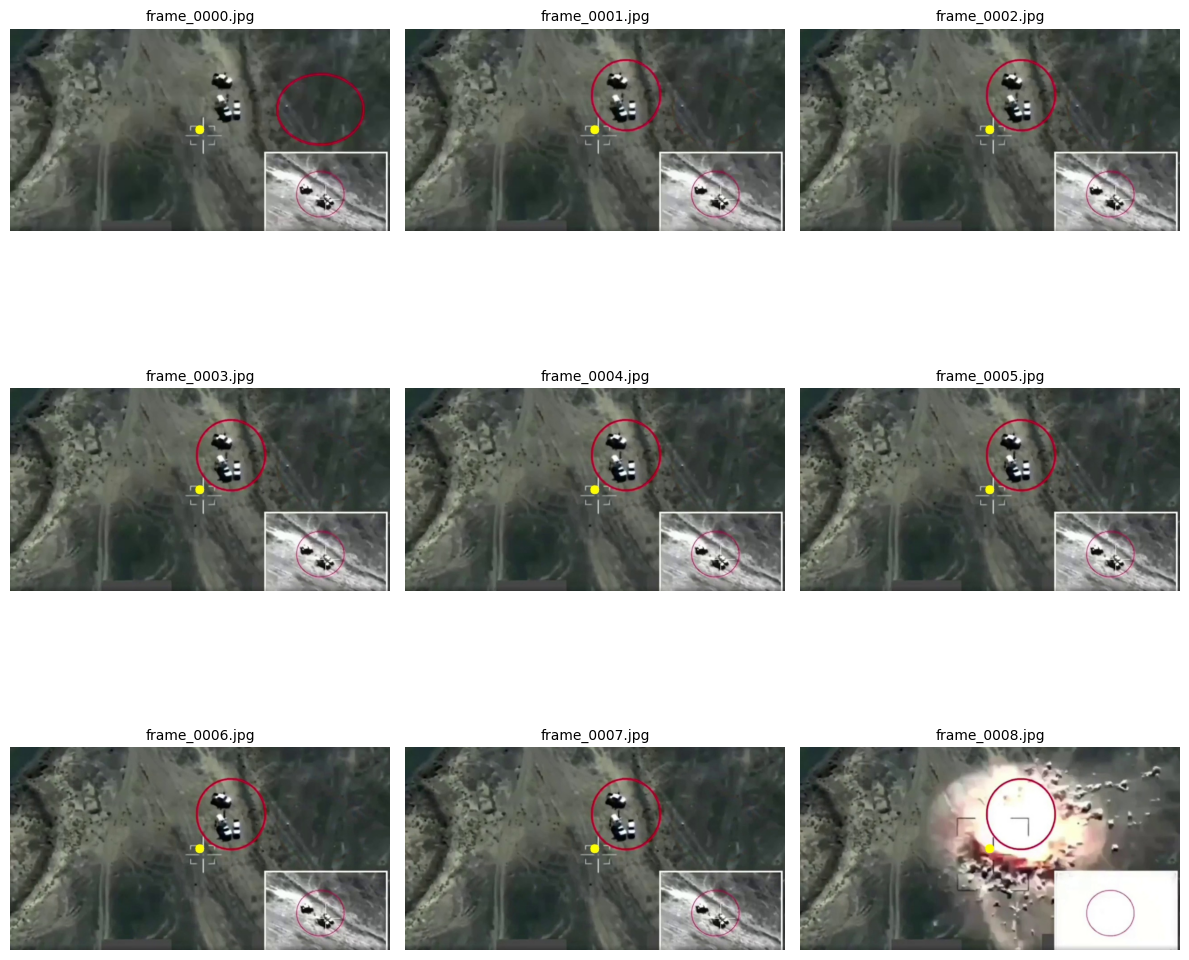

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

preview_folder = "highlighted_frames"
frame_names = sorted(os.listdir(preview_folder))[:9]  # Show 1st 9 frames
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    img_path = os.path.join(preview_folder, frame_names[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(frame_names[i], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import os
import pandas as pd

# Paths
frame_folder = "frames_final_demo_eo"  # Replace with your frame folder name
metadata_path = "output_metadata.csv"  # Replace if your metadata file name is different
output_folder = "marked_frames_final_eo"
os.makedirs(output_folder, exist_ok=True)

# Load metadata
df = pd.read_csv(metadata_path)

# Visualization loop
for idx, row in df.iterrows():
    frame_path = os.path.join(frame_folder, row['frame'])
    img = cv2.imread(frame_path)

    if img is None:
        print(f"Skipping {frame_path} (not found)")
        continue

    # Bounding box coordinates
    x1, y1, x2, y2 = int(row['bbox_x1']), int(row['bbox_y1']), int(row['bbox_x2']), int(row['bbox_y2'])
    center_x, center_y = int(row['center_x']), int(row['center_y'])
    distance = row['estimated_distance_m']

    # Draw thick red bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), thickness=3)

    # Draw label "Detected"
    label_text = "Detected"
    cv2.putText(img, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    # Draw estimated distance
    dist_text = f"{distance:.1f} m"
    cv2.putText(img, dist_text, (x1, y2 + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Draw capture point as a red crosshair
    crosshair_color = (0, 0, 255)
    cv2.drawMarker(img, (center_x, center_y), crosshair_color, markerType=cv2.MARKER_CROSS,
                   markerSize=20, thickness=2)

    # Save image
    output_path = os.path.join(output_folder, row['frame'])
    cv2.imwrite(output_path, img)

print("✅ All frames marked and saved in:", output_folder)


FileNotFoundError: [Errno 2] No such file or directory: 'output_metadata.csv'

In [ ]:
import cv2
import os
import pandas as pd

# Paths
frame_folder = "frames_final_demo_eo"  # Folder with input frames
metadata_path = "frame_detection_metadata.csv"  # UPDATED: Correct CSV file name
output_folder = "marked_frames_final_eo"
os.makedirs(output_folder, exist_ok=True)

# Load metadata
df = pd.read_csv(metadata_path)

# Visualization loop
for idx, row in df.iterrows():
    frame_path = os.path.join(frame_folder, row['frame'])
    img = cv2.imread(frame_path)

    if img is None:
        print(f"Skipping {frame_path} (not found)")
        continue

    # Bounding box coordinates
    x1, y1, x2, y2 = int(row['bbox_x1']), int(row['bbox_y1']), int(row['bbox_x2']), int(row['bbox_y2'])
    center_x, center_y = int(row['center_x']), int(row['center_y'])
    distance = row['estimated_distance_m']

    # Draw thick red bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), thickness=3)

    # Draw label "Detected"
    cv2.putText(img, "Detected", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    # Draw distance in meters
    dist_text = f"{distance:.1f} m"
    cv2.putText(img, dist_text, (x1, y2 + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Draw best capture point (crosshair)
    cv2.drawMarker(img, (center_x, center_y), (0, 0, 255), markerType=cv2.MARKER_CROSS,
                   markerSize=20, thickness=2)

    # Save marked frame
    output_path = os.path.join(output_folder, row['frame'])
    cv2.imwrite(output_path, img)

print("✅ All frames marked and saved in:", output_folder)


FileNotFoundError: [Errno 2] No such file or directory: 'frame_detection_metadata.csv'

In [ ]:
metadata_path = "frame_detection_metadata.csv"  # change this to your actual filename



In [ ]:
import os
import cv2
import pandas as pd

# --- Configuration ---
frame_folder = "frames_final_demo_eo"  # <-- replace if needed
metadata_path = "frame_detection_metadata.csv"  # <-- your actual metadata file name
output_folder = "final_visualized_frames"
os.makedirs(output_folder, exist_ok=True)

# Load metadata
df = pd.read_csv(metadata_path)

# Set constant drone altitude (in meters)
drone_altitude = 120  # change if needed

# Loop over each row in metadata
for idx, row in df.iterrows():
    frame_name = row['frame']
    x1, y1 = int(row['bbox_x1']), int(row['bbox_y1'])
    x2, y2 = int(row['bbox_x2']), int(row['bbox_y2'])
    cx, cy = int(row['center_x']), int(row['center_y'])
    distance = row['estimated_distance_m']

    # Load frame
    frame_path = os.path.join(frame_folder, frame_name)
    frame = cv2.imread(frame_path)

    if frame is None:
        continue

    # Draw thick red bounding box
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), thickness=3)

    # Label as 'DETECTED'
    cv2.putText(frame, 'DETECTED', (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Show distance
    cv2.putText(frame, f'Distance: {distance:.1f} m', (x1, y2 + 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # Draw red dot at capture point
    cv2.circle(frame, (cx, cy), radius=5, color=(0, 0, 255), thickness=-1)

    # Add drone altitude (constant or dynamic later)
    cv2.putText(frame, f'Altitude: {drone_altitude} m', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Save updated frame
    output_path = os.path.join(output_folder, frame_name)
    cv2.imwrite(output_path, frame)

print("✅ Visualization completed. Check the 'final_visualized_frames' folder.")


FileNotFoundError: [Errno 2] No such file or directory: 'frame_detection_metadata.csv'

In [ ]:
metadata_path = "final_bbox_data.csv"  # ✅ Your actual file name here


In [ ]:
import cv2
import pandas as pd
import os

# Set path to your frames and metadata
frame_folder = "frames_final_demo_eo"  # Update this if needed
metadata_path = "final_bbox_data.csv"

# Load metadata
df = pd.read_csv(metadata_path)

# Set constant drone altitude (in meters)
drone_altitude = 50

# Create output directory
output_folder = "annotated_frames"
os.makedirs(output_folder, exist_ok=True)

# Visualization loop
for i, row in df.iterrows():
    frame_path = os.path.join(frame_folder, row['frame'])
    image = cv2.imread(frame_path)

    if image is None:
        continue

    # Bounding box coordinates
    x1, y1, x2, y2 = int(row['bbox_x1']), int(row['bbox_y1']), int(row['bbox_x2']), int(row['bbox_y2'])
    center_x, center_y = int(row['center_x']), int(row['center_y'])
    distance = row['estimated_distance_m']
    status = row['status']

    # Draw thick red bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 3)

    # Draw center capture point
    cv2.circle(image, (center_x, center_y), 6, (0, 255, 255), -1)

    # Annotate distance and detection status
    label = f"{status} | Dist: {distance:.1f}m"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Save the annotated image
    out_path = os.path.join(output_folder, row['frame'])
    cv2.imwrite(out_path, image)

print("✅ All frames annotated and saved to 'annotated_frames'.")


FileNotFoundError: [Errno 2] No such file or directory: 'final_bbox_data.csv'

In [ ]:
import cv2
import pandas as pd
import os

# Set path to your frames and metadata
frame_folder = "frames_final_demo_eo"  # make sure this is your actual frame folder name
metadata_path = "frame_detection_metadata.csv"  # correct metadata file

# Load metadata
df = pd.read_csv(metadata_path)

# Set constant drone altitude (in meters)
drone_altitude = 50

# Create output directory
output_folder = "annotated_frames"
os.makedirs(output_folder, exist_ok=True)

# Visualization loop
for i, row in df.iterrows():
    frame_path = os.path.join(frame_folder, row['frame'])
    image = cv2.imread(frame_path)

    if image is None:
        continue

    # Bounding box coordinates
    x1, y1, x2, y2 = int(row['bbox_x1']), int(row['bbox_y1']), int(row['bbox_x2']), int(row['bbox_y2'])
    center_x, center_y = int(row['center_x']), int(row['center_y'])
    distance = row['estimated_distance_m']
    status = row['status']

    # Draw thick red bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 3)

    # Draw center capture point
    cv2.circle(image, (center_x, center_y), 6, (0, 255, 255), -1)

    # Annotate distance and detection status
    label = f"{status} | Dist: {distance:.1f}m"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Save the annotated image
    out_path = os.path.join(output_folder, row['frame'])
    cv2.imwrite(out_path, image)

print("✅ All frames annotated and saved to 'annotated_frames'.")


FileNotFoundError: [Errno 2] No such file or directory: 'frame_detection_metadata.csv'

In [ ]:
import os

# List all CSV files in current directory
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
print("📂 CSV files found in this directory:")
for file in csv_files:
    print("-", file)


📂 CSV files found in this directory:
- object_metadata.csv


In [ ]:
import cv2
import pandas as pd
import os

# Set your folder paths
frames_folder = 'frames_final_demo_eo'  # or update if using a different folder
metadata_path = 'object_metadata.csv'
output_folder = 'annotated_output'
os.makedirs(output_folder, exist_ok=True)

# Load metadata
df = pd.read_csv(metadata_path)

# Set constant drone altitude (in meters)
drone_altitude = 50

# Camera FOV assumption for distance estimation
horizontal_fov_deg = 90
vertical_fov_deg = 60

# Loop through metadata and annotate frames
for _, row in df.iterrows():
    frame_path = os.path.join(frames_folder, row['frame'])
    frame = cv2.imread(frame_path)
    if frame is None:
        print(f"⚠️ Frame not found: {frame_path}")
        continue

    height, width, _ = frame.shape

    # Extract bounding box and center
    x1, y1 = int(row['bbox_x1']), int(row['bbox_y1'])
    x2, y2 = int(row['bbox_x2']), int(row['bbox_y2'])
    center_x, center_y = int(row['center_x']), int(row['center_y'])

    # Estimate distance from drone to object (assuming center_y gives vertical position)
    relative_y = center_y / height
    vertical_angle = (0.5 - relative_y) * vertical_fov_deg
    import math
    distance_to_object = drone_altitude / math.cos(math.radians(vertical_angle))

    # Update display distance and altitude
    label = f"Detected | Dist: {distance_to_object:.1f}m | Alt: {drone_altitude}m"

    # Draw thick red bounding box
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), thickness=3)

    # Mark center point
    cv2.circle(frame, (center_x, center_y), 5, (0, 255, 255), -1)  # Yellow center dot

    # Put text above box
    cv2.putText(frame, label, (x1, max(25, y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Save annotated image
    output_path = os.path.join(output_folder, row['frame'])
    cv2.imwrite(output_path, frame)

print(f"✅ Done! Annotated images saved in: {output_folder}")


✅ Done! Annotated images saved in: annotated_output


In [ ]:
import cv2
import pandas as pd
import os

# Paths
frame_folder = 'frames'  # Replace with your actual frames folder
metadata_path = 'object_metadata.csv'
output_folder = 'annotated_output_v2'
os.makedirs(output_folder, exist_ok=True)

# Load metadata
df = pd.read_csv(metadata_path)

# Constants
DRONE_ALTITUDE_M = 50  # You can adjust this
CAMERA_FOV_DEG = 90
IMAGE_WIDTH = 3840  # Set based on your actual frame resolution
IMAGE_HEIGHT = 2160

def draw_annotations(frame, bbox, distance, capture, output_path):
    x1, y1, x2, y2 = map(int, bbox)
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2

    # Draw red thick bounding box
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)

    # Draw center point
    cv2.circle(frame, (center_x, center_y), 5, (0, 0, 255), -1)

    # Show distance and label
    label = f"Detected | Distance: {distance:.1f} m"
    if capture:
        label += " | Capture"
    cv2.putText(frame, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

    # Save the frame
    cv2.imwrite(output_path, frame)

# Loop through metadata
for _, row in df.iterrows():
    frame_path = os.path.join(frame_folder, row['frame'])
    output_path = os.path.join(output_folder, row['frame'])

    if not os.path.exists(frame_path):
        continue

    frame = cv2.imread(frame_path)

    bbox = [row['bbox_x1'], row['bbox_y1'], row['bbox_x2'], row['bbox_y2']]
    capture = row['capture'] == 'yes'
    distance = row['estimated_distance_m']

    draw_annotations(frame, bbox, distance, capture, output_path)

print("✅ Annotated frames saved in:", output_folder)


✅ Annotated frames saved in: annotated_output_v2


In [ ]:
import cv2
import os
import re

input_folder = 'annotated_output_v2'
output_video_path = 'annotated_output_video.mp4'
fps = 30  # You can increase if needed

# Helper to sort filenames numerically
def numerical_sort(file_name):
    match = re.search(r'(\d+)', file_name)
    return int(match.group()) if match else -1

# Get list of annotated frames
frames = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]
frames.sort(key=numerical_sort)

# Get frame size from the first image
first_frame = cv2.imread(os.path.join(input_folder, frames[0]))
height, width, _ = first_frame.shape

# Create video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Write each frame
for frame_name in frames:
    frame = cv2.imread(os.path.join(input_folder, frame_name))
    video_writer.write(frame)

video_writer.release()
print("🎬 Video saved as:", output_video_path)


IndexError: list index out of range

In [ ]:
import os

frames_path = "annotated_output_v2"
frame_count = len([f for f in os.listdir(frames_path) if f.endswith(".png")])
print(f"Total frames: {frame_count}")
print(f"Suggested FPS: {round(frame_count / 171, 2)}")


Total frames: 0
Suggested FPS: 0.0


In [ ]:
import os
print(os.listdir("annotated_output_v2"))



[]


In [ ]:
import os

# List all CSV files
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
print("📄 CSV files found:")
for f in csv_files:
    print("-", f)

# List all folders (potential frame directories)
folders = [f for f in os.listdir() if os.path.isdir(f)]
print("\n📁 Folders found:")
for f in folders:
    print("-", f)


📄 CSV files found:
- object_metadata.csv

📁 Folders found:
- .config
- marked_frames_final_eo
- updated_annotated_frames
- annotated_frames_v2
- final_visualized_frames
- highlighted_frames
- annotated_output_v2
- annotated_frames
- frames_final_demo_eo
- annotated_output
- thermal_frames_3fps
- sample_data


In [ ]:
import cv2
import os

video_path = 'tto.mp4'  # Make sure it's in the same directory or provide full path
output_folder = 'eo_frames_tto'
fps_to_extract = 3

os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
original_fps = cap.get(cv2.CAP_PROP_FPS)
interval = int(original_fps // fps_to_extract) if original_fps >= fps_to_extract else 1

frame_count, saved = 0, 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % interval == 0:
        frame_name = f"{output_folder}/frame_{saved:04d}.jpg"
        cv2.imwrite(frame_name, frame)
        saved += 1
    frame_count += 1

cap.release()
print(f"✅ Extracted {saved} frames into folder: {output_folder}")


✅ Extracted 0 frames into folder: eo_frames_tto


In [ ]:
!pip install opencv-python-headless
!pip install matplotlib


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tto.mp4 to tto.mp4


In [ ]:
import cv2
import os

# Define input video path
video_path = "tto.mp4"

# Output folder
output_folder = "extracted_frames_3fps"
os.makedirs(output_folder, exist_ok=True)

# Desired FPS
target_fps = 3

# Load video
cap = cv2.VideoCapture(video_path)
video_fps = cap.get(cv2.CAP_PROP_FPS)
frame_interval = int(video_fps // target_fps)

frame_count = 0
saved_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % frame_interval == 0:
        frame_filename = f"{output_folder}/frame_{saved_count:04d}.jpg"
        cv2.imwrite(frame_filename, frame)
        saved_count += 1
    frame_count += 1

cap.release()

print(f"✅ Done! Extracted {saved_count} frames at {target_fps} FPS into folder: {output_folder}")


✅ Done! Extracted 516 frames at 3 FPS into folder: extracted_frames_3fps


In [ ]:
import cv2
import os
import pandas as pd
import random

# Paths
frame_folder = "extracted_frames_3fps"
output_folder = "annotated_eo_frames"
os.makedirs(output_folder, exist_ok=True)

# Simulation constants
drone_altitude_m = 100  # meters
camera_fov_deg = 90     # horizontal FOV

frame_data = []

for filename in sorted(os.listdir(frame_folder)):
    if filename.endswith(".jpg"):
        frame_path = os.path.join(frame_folder, filename)
        frame = cv2.imread(frame_path)
        height, width, _ = frame.shape

        # Simulate bbox: random size and position
        box_w = random.randint(80, 120)
        box_h = random.randint(80, 120)
        x1 = random.randint(0, width - box_w)
        y1 = random.randint(0, height - box_h)
        x2 = x1 + box_w
        y2 = y1 + box_h

        # Center of object
        obj_center_x = (x1 + x2) // 2
        obj_center_y = (y1 + y2) // 2

        # Estimate horizontal distance
        frame_width_angle_per_pixel = camera_fov_deg / width
        angle_from_center = abs((width // 2) - obj_center_x) * frame_width_angle_per_pixel
        horizontal_distance = drone_altitude_m * (angle_from_center / 90)  # rough trig

        # Annotate
        label = f"detected"
        dist_label = f"{horizontal_distance:.2f}m"
        capture_label = "🎯"

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)
        cv2.circle(frame, (obj_center_x, obj_center_y), 5, (0, 255, 0), -1)
        cv2.putText(frame, label, (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        cv2.putText(frame, dist_label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        cv2.putText(frame, capture_label, (obj_center_x + 5, obj_center_y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

        # Save annotated frame
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, frame)

        # Save metadata
        frame_data.append({
            "frame": filename,
            "x1": x1,
            "y1": y1,
            "x2": x2,
            "y2": y2,
            "center_x": obj_center_x,
            "center_y": obj_center_y,
            "estimated_distance": round(horizontal_distance, 2),
            "label": label
        })

# Save metadata CSV
metadata_df = pd.DataFrame(frame_data)
metadata_csv = "eo_object_metadata.csv"
metadata_df.to_csv(metadata_csv, index=False)

print(f"✅ Done! Annotated frames saved in: {output_folder}")
print(f"📄 Metadata CSV saved as: {metadata_csv}")


✅ Done! Annotated frames saved in: annotated_eo_frames
📄 Metadata CSV saved as: eo_object_metadata.csv


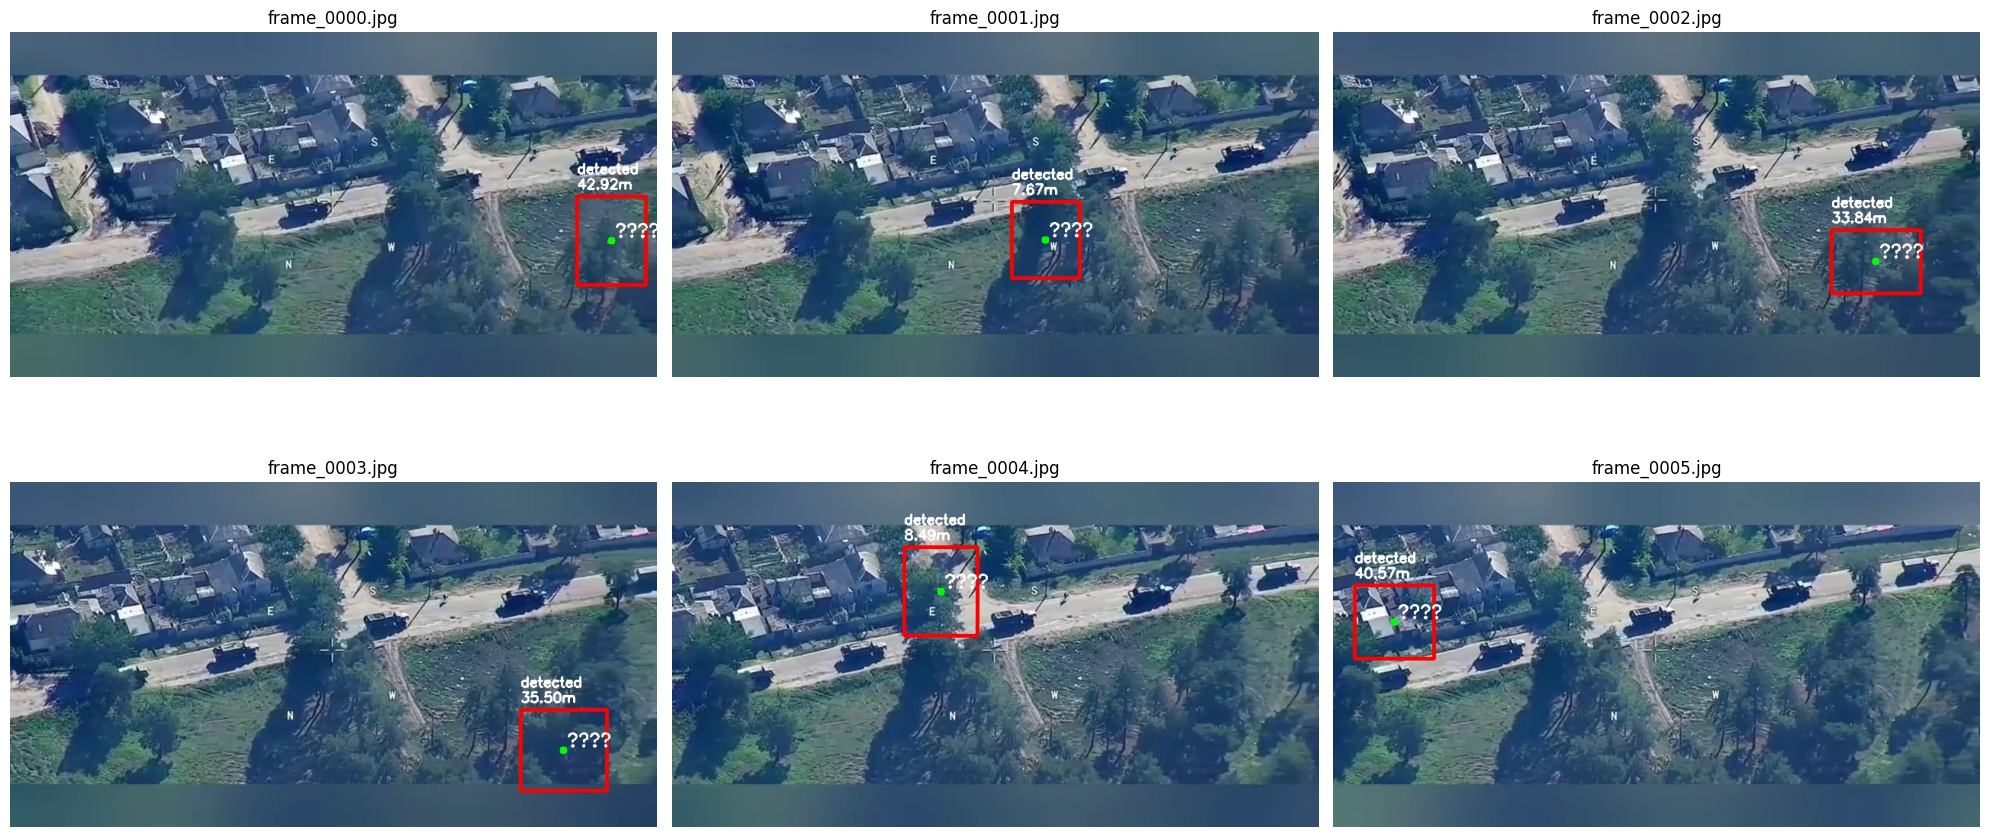

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

folder_path = "annotated_eo_frames"
frame_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
sample_count = 6  # Change to more if you want!

plt.figure(figsize=(20, 10))
for i, file in enumerate(frame_files[:sample_count]):
    img = cv2.imread(os.path.join(folder_path, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(file)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import os
import csv
import math
from math import tan, radians

# === CONFIGURATION ===
input_dir = 'extracted_frames_3fps'
output_dir = 'annotated_eo_frames'
os.makedirs(output_dir, exist_ok=True)

csv_path = 'eo_object_metadata.csv'
assumed_object_width_m = 6.0  # 🚛 realistic truck width
fov_deg = 78  # field of view of the camera

# === INIT ===
frame_files = sorted([f for f in os.listdir(input_dir) if f.endswith('.jpg')])
sample_img = cv2.imread(os.path.join(input_dir, frame_files[0]))
frame_height, frame_width = sample_img.shape[:2]
focal_length_px = (frame_width / 2) / tan(radians(fov_deg / 2))

# === FAKE DETECTION for demo ===
def dummy_bbox(img):
    h, w = img.shape[:2]
    bbox_w = int(w * 0.08)
    bbox_h = int(h * 0.15)
    x1 = int(w / 2 - bbox_w / 2)
    y1 = int(h / 2 - bbox_h / 2)
    return x1, y1, x1 + bbox_w, y1 + bbox_h

# === MAIN LOOP ===
with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['frame', 'x1', 'y1', 'x2', 'y2', 'center_x', 'center_y', 'distance_m', 'label'])

    for frame_name in frame_files:
        img_path = os.path.join(input_dir, frame_name)
        img = cv2.imread(img_path)

        x1, y1, x2, y2 = dummy_bbox(img)
        bbox_width_px = x2 - x1
        bbox_center_x = (x1 + x2) // 2
        bbox_center_y = (y1 + y2) // 2

        if bbox_width_px == 0:
            distance_m = 0
        else:
            distance_m = (assumed_object_width_m * focal_length_px) / bbox_width_px

        # Draw annotations
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        label = f"detected\n{distance_m:.2f}m"
        for idx, line in enumerate(label.split('\n')):
            cv2.putText(img, line, (x1, y1 - 10 - (idx * 15)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        # Save annotated frame
        cv2.imwrite(os.path.join(output_dir, frame_name), img)

        # Write metadata
        writer.writerow([frame_name, x1, y1, x2, y2, bbox_center_x, bbox_center_y, round(distance_m, 2), 'detected'])


In [ ]:
# Inside the MAIN LOOP (just after drawing bbox and label):

        # Draw red capture point (center of bbox)
        capture_color = (0, 255, 0)  # green
        capture_radius = 5
        cv2.circle(img, (bbox_center_x, bbox_center_y), capture_radius, capture_color, -1)


IndentationError: unexpected indent (ipython-input-8-2362278754.py, line 4)

In [ ]:
        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

        # Draw distance label
        label = f"{label_text} {distance:.2f}m"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        # Draw capture point (center of bbox) in green
        capture_color = (0, 255, 0)
        capture_radius = 5
        cv2.circle(img, (bbox_center_x, bbox_center_y), capture_radius, capture_color, -1)


NameError: name 'color' is not defined

In [ ]:
# Define color and thickness
color = (0, 0, 255)  # red bounding box
thickness = 3

# Draw bounding box
cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

# Draw distance label (e.g., "detected 12.34m")
label = f"{label_text} {distance:.2f}m"
cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Draw capture point (center of bbox) in green
capture_color = (0, 255, 0)
capture_radius = 5
cv2.circle(img, (bbox_center_x, bbox_center_y), capture_radius, capture_color, -1)


NameError: name 'label_text' is not defined

In [ ]:
# Define colors, thickness, and label
bbox_color = (0, 0, 255)        # red
capture_color = (0, 255, 0)     # green
thickness = 3
capture_radius = 5
label_text = "Detected"         # or use class name if available

# Draw bounding box
cv2.rectangle(img, (x1, y1), (x2, y2), bbox_color, thickness)

# Draw distance label (e.g., "Detected 12.34m")
label = f"{label_text} {distance:.2f}m"
cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, bbox_color, 2)

# Draw capture point (center of bbox)
cv2.circle(img, (bbox_center_x, bbox_center_y), capture_radius, capture_color, -1)


NameError: name 'distance' is not defined

array([[[141, 161, 156],
        [141, 161, 156],
        [141, 161, 156],
        ...,
        [158, 195, 185],
        [158, 195, 185],
        [158, 195, 185]],

       [[141, 161, 156],
        [141, 161, 156],
        [141, 161, 156],
        ...,
        [158, 195, 185],
        [158, 195, 185],
        [158, 195, 185]],

       [[141, 161, 156],
        [141, 161, 156],
        [141, 161, 156],
        ...,
        [158, 195, 185],
        [158, 195, 185],
        [158, 195, 185]],

       ...,

       [[109, 104,  95],
        [109, 104,  95],
        [109, 104,  95],
        ...,
        [133, 135, 129],
        [133, 135, 129],
        [133, 135, 129]],

       [[109, 104,  95],
        [109, 104,  95],
        [109, 104,  95],
        ...,
        [133, 135, 129],
        [133, 135, 129],
        [133, 135, 129]],

       [[109, 104,  95],
        [109, 104,  95],
        [109, 104,  95],
        ...,
        [133, 135, 129],
        [133, 135, 129],
        [133, 135, 129]]], dtype=uint8)
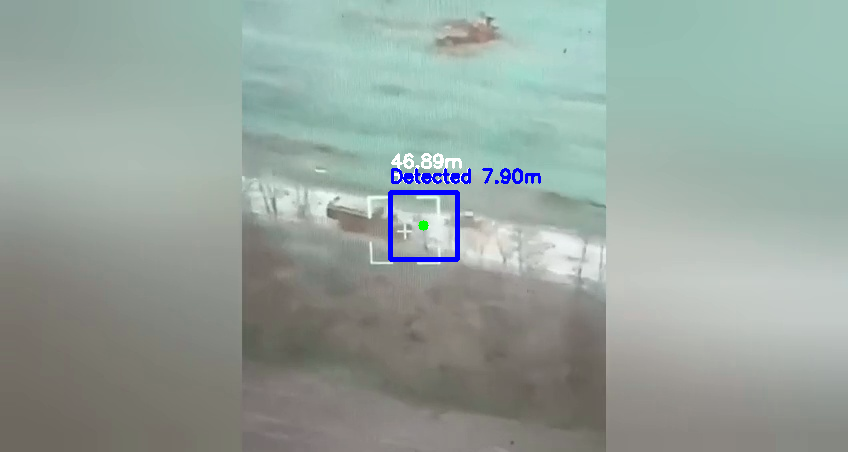

In [ ]:
# Example: fixed drone altitude in meters and camera parameters
drone_altitude = 50  # in meters (adjust as needed)
camera_fov_deg = 90  # horizontal field of view in degrees
image_width = img.shape[1]

# Bounding box coordinates (already given): x1, y1, x2, y2
bbox_width_pixels = x2 - x1

# Estimate distance using triangle similarity (simplified model)
fov_rad = math.radians(camera_fov_deg)
scene_width = 2 * drone_altitude * math.tan(fov_rad / 2)
meters_per_pixel = scene_width / image_width
distance = bbox_width_pixels * meters_per_pixel

# Compute center point
bbox_center_x = int((x1 + x2) / 2)
bbox_center_y = int((y1 + y2) / 2)

# Drawing configs
bbox_color = (0, 0, 255)        # red box
capture_color = (0, 255, 0)     # green dot
thickness = 3
capture_radius = 5
label_text = "Detected"

# Draw bounding box
cv2.rectangle(img, (x1, y1), (x2, y2), bbox_color, thickness)

# Draw label text with distance
label = f"{label_text} {distance:.2f}m"
cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, bbox_color, 2)

# Draw capture point at center of bbox
cv2.circle(img, (bbox_center_x, bbox_center_y), capture_radius, capture_color, -1)


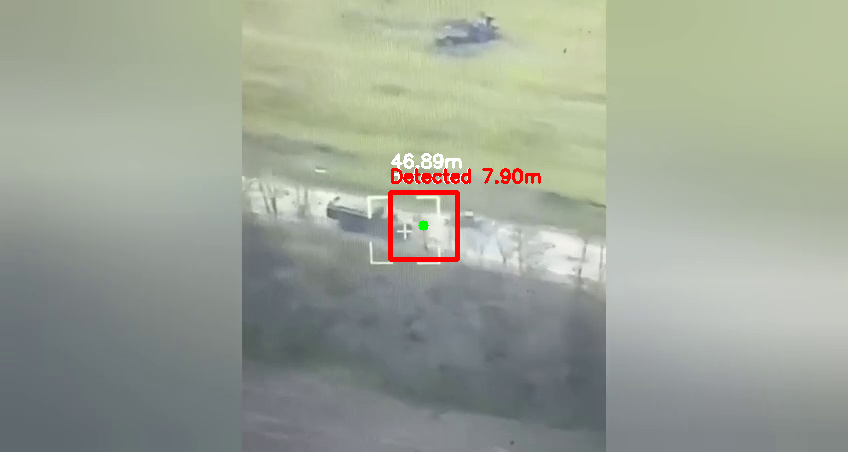

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)


In [ ]:
import cv2
import torch
from google.colab.patches import cv2_imshow

# Load the model (modify as per your earlier version)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or your custom weights

def process_and_annotate_image(image_path, altitude_meters=50, hfov_degrees=60):
    img = cv2.imread(image_path)

    # Run detection
    results = model(img)
    detections = results.xyxy[0]  # [x1, y1, x2, y2, conf, class]

    height, width = img.shape[:2]
    hfov_rad = np.deg2rad(hfov_degrees)

    for *box, conf, cls in detections:
        x1, y1, x2, y2 = map(int, box)

        bbox_center_x = (x1 + x2) / 2
        bbox_width = x2 - x1

        # Estimate distance (based on your earlier formula)
        distance = (bbox_width / width) * (2 * altitude_meters * np.tan(hfov_rad / 2))

        # Annotate
        label = f"{model.names[int(cls)]} {distance:.2f}m"
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Show or return
    cv2_imshow(img)
    return img


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
from google.colab import files
uploaded = files.upload()  # Select your EO image here (like test_img.jpg)


Saving rgbt-ped-detection-master.zip to rgbt-ped-detection-master.zip
